In [11]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.decomposition import PCA

In [12]:
y_target = np.load("labels.npz")['a']
X_features = np.load("features.npz")['a']

In [13]:
model=GaussianNB()
model.fit(X_features, y_target)
score_kfold=cross_val_score(model, X_features, y_target, cv=10).mean() #cv is the number of folds
print(score_kfold)

0.5752481713688611


In [14]:
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut 

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X_features, y_target, cv = k_folds) 
print("Average CV Score: ", scores.mean())

Average CV Score:  0.5590607553366175


In [15]:
loo = LeaveOneOut()
scores = cross_val_score(model, X_features, y_target, cv = loo) 
print("Average CV Score using LOO: ", scores.mean())

Average CV Score using LOO:  0.5774971297359357


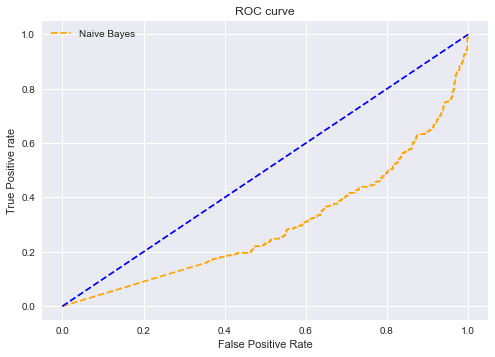

In [16]:
# predict probabilities

pred_prob = model.predict_proba(X_features)
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_target, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_target))]
p_fpr, p_tpr, _ = roc_curve(y_target, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


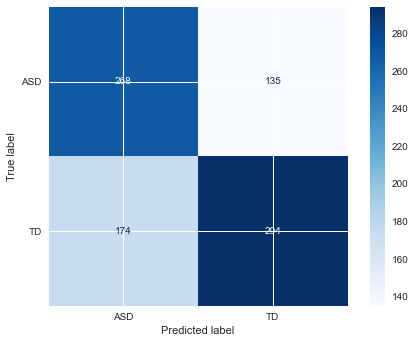

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                      X_features, y_target,
                      values_format='d',
                      display_labels=["ASD","TD"], cmap="Blues")

In [18]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_target, model.predict(X_features)))

print(accuracy_score(y_target, model.predict(X_features)))

              precision    recall  f1-score   support

           1       0.61      0.67      0.63       403
           2       0.69      0.63      0.66       468

    accuracy                           0.65       871
   macro avg       0.65      0.65      0.64       871
weighted avg       0.65      0.65      0.65       871

0.6452353616532721
